# Read File

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset

df = pd.read_csv(r'C:\Users\EBUKA\Documents\Business Analysis Algorithm\social_data\social_media_engagement.csv')
df = pd.DataFrame(df)

'''# Split the post_time column into date and time columns
df[['date', 'time']] = df['post_time'].str.split(' ', expand=True)

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert the time column to time
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

# Drop the original post_time column if no longer needed
df.drop(columns=['post_time'], inplace=True)

# Reorder the columns to place 'date' and 'time' after 'post_type'
cols = df.columns.tolist()
post_type_index = cols.index('post_type')
new_order = cols[:post_type_index + 1] + ['date','post_day', 'time'] + cols[post_type_index + 1:]

new_order = [col for col in new_order if col not in ['date','post_day', 'time']]
new_order.insert(post_type_index + 1, 'date')
new_order.insert(post_type_index + 2, 'post_day')
new_order.insert(post_type_index + 3, 'time')

# Reorder the columns in the dataframe
df = df[new_order]

# Present date as Day-Month-Year
df['date'] = df['date'].dt.strftime('%d-%m-%Y')

# Present time as 12-hour format with AM/PM
df['time'] = df['time'].apply(lambda x: x.strftime('%I:%M %p'))

# Display the dataframe info
df['post_type'].value_counts()'''

df.head(5)

,post_id,platform,post_type,date,post_day,time,caption,hashtags,num_likes,num_comments,num_shares,caption_length,num_hashtags,post_hour,sentiment_score
0,1,Facebook,image,17-08-2023,Thursday,02:45 PM,Best day ever! 🎉,#Social,2121,474,628,16,1,14,positive
1,2,Facebook,carousel,14-05-2023,Sunday,12:45 AM,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,0,neutral
2,3,Instagram,poll,21-02-2023,Tuesday,04:15 PM,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,16,negative
3,4,Twitter,image,16-11-2023,Thursday,12:45 AM,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,0,negative
4,5,Twitter,video,23-05-2023,Tuesday,12:30 AM,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,0,positive


In [3]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    """
    Detect outliers in a DataFrame column using the IQR method.
    
    Args:
        data (pd.DataFrame): Input DataFrame
        column (str): Column name to analyze
    
    Returns:
        pd.DataFrame: Subset of rows containing outliers
    """
    try:
        # Ensure the column exists and is numeric
        if column not in data.columns:
            raise ValueError(f"Column '{column}' not found in DataFrame")
        if not pd.api.types.is_numeric_dtype(data[column]):
            raise ValueError(f"Column '{column}' must be numeric")
        
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        return outliers
    
    except Exception as e:
        print(f"Error processing column '{column}': {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

# Detect outliers for engagement metrics
outliers_likes = detect_outliers_iqr(df, "num_likes")
outliers_comments = detect_outliers_iqr(df, "num_comments")
outliers_shares = detect_outliers_iqr(df, "num_shares")

# Count of outliers in each column
outlier_counts = {
    "num_likes": len(outliers_likes),
    "num_comments": len(outliers_comments),
    "num_shares": len(outliers_shares),
}

# Display results
print("Outlier Counts:")
for metric, count in outlier_counts.items():
    print(f"{metric}: {count}")
'''print("\nOutliers in num_likes:\n", outliers_likes)
print("\nOutliers in num_comments:\n", outliers_comments)
print("\nOutliers in num_shares:\n", outliers_shares)'''

Outlier Counts:
num_likes: 0
num_comments: 0
num_shares: 0


'print("\nOutliers in num_likes:\n", outliers_likes)\nprint("\nOutliers in num_comments:\n", outliers_comments)\nprint("\nOutliers in num_shares:\n", outliers_shares)'

# Platform Analysis

We will analyze the data with regards to the platforms by calculating the following metrics:

01. The number of posts per platform.
02. The number of likes per platform.
03. The number of comments per platform.
04. The number of shares per platform.
05. The average number of likes, comments, and shares per post for each platform.
06. The total engagement (likes + comments + shares) per platform.
07. The average engagement per post for each platform.
08. The engagement rate per platform.
09. The top 5 posts per platform based on engagement.
10. The top 5 posts per platform based on likes.

### Platform Segmentation

We will segment the platforms by content types: 




In [4]:
# Rename the existing columns to match the required column names
df.rename(columns={'likes': 'num_likes', 'comments': 'num_comments', 'shares': 'num_shares'}, inplace=True)

# Check if the required columns exist in the DataFrame
required_columns = ['platform', 'post_id', 'num_likes', 'num_comments', 'num_shares']
if all(column in df.columns for column in required_columns):
    # Calculate number of posts, likes, comments, and shares per platform
    platform_stats = df.groupby('platform').agg(
        num_posts=('post_id', 'count'),
        num_likes=('num_likes', 'sum'),
        num_comments=('num_comments', 'sum'),
        num_shares=('num_shares', 'sum')
    ).reset_index()

    # Calculate average likes, comments, and shares per post per platform
    platform_stats['avg_likes'] = (platform_stats['num_likes'] / platform_stats['num_posts']).round(1)
    platform_stats['avg_comments'] = (platform_stats['num_comments'] / platform_stats['num_posts']).round(1)
    platform_stats['avg_shares'] = (platform_stats['num_shares'] / platform_stats['num_posts']).round(1)

    # Calculate total engagement per platform
    platform_stats['total_engagement'] = platform_stats['num_likes'] + platform_stats['num_comments'] + platform_stats['num_shares']
    # Calculate average engagement per post per platform
    platform_stats['avg_engagement'] = (platform_stats['total_engagement'] / platform_stats['num_posts']).round(1)
   
 # Format the numbers with commas as thousands separators
   # platform_stats['num_posts'] = platform_stats['num_posts'].apply(lambda x: f"{x:,}")
   # platform_stats['num_likes'] = platform_stats['num_likes'].apply(lambda x: f"{x:,}")
   # platform_stats['num_comments'] = platform_stats['num_comments'].apply(lambda x: f"{x:,}")
   # platform_stats['num_shares'] = platform_stats['num_shares'].apply(lambda x: f"{x:,}")
   # platform_stats['avg_likes'] = platform_stats['avg_likes'].apply(lambda x: f"{x:,.1f}")
   # platform_stats['avg_comments'] = platform_stats['avg_comments'].apply(lambda x: f"{x:,.1f}")
   # platform_stats['avg_shares'] = platform_stats['avg_shares'].apply(lambda x: f"{x:,.1f}")
   # platform_stats['total_engagement'] = platform_stats['total_engagement'].apply(lambda x: f"{x:,.1f}")
   # platform_stats['avg_engagement'] = platform_stats['avg_engagement'].apply(lambda x: f"{x:,.1f}")


    # Compute above without formatting commas
    platform_stats['num_posts'] = platform_stats['num_posts']
    platform_stats['num_likes'] = platform_stats['num_likes']
    platform_stats['num_comments'] = platform_stats['num_comments']
    platform_stats['num_shares'] = platform_stats['num_shares']
    platform_stats['avg_likes'] = platform_stats['avg_likes']
    platform_stats['avg_comments'] = platform_stats['avg_comments']
    platform_stats['avg_shares'] = platform_stats['avg_shares']
    platform_stats['total_engagement'] = platform_stats['total_engagement']
    platform_stats['avg_engagement'] = platform_stats['avg_engagement']

    
    # Save the platform statistics to a CSV file
    platform_stats.to_csv(r'C:\\Users\\EBUKA\\Documents\\Business Analysis Algorithm\\social_data\\platform_analyzer.csv', index=False)

else:
    print("One or more required columns do not exist in the DataFrame.")

platform_stats.head(5)

,platform,num_posts,num_likes,num_comments,num_shares,avg_likes,avg_comments,avg_shares,total_engagement,avg_engagement
0,Facebook,327,869868,90136,160292,2660.1,275.6,490.2,1120296,3426.0
1,Instagram,345,900379,88018,180986,2609.8,255.1,524.6,1169383,3389.5
2,Twitter,328,499804,40093,79532,1523.8,122.2,242.5,619429,1888.5


C:\Users\EBUKA\AppData\Local\Temp\ipykernel_21156\4178048930.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='avg_engagement', data=platform_stats, palette='viridis', ax=ax)


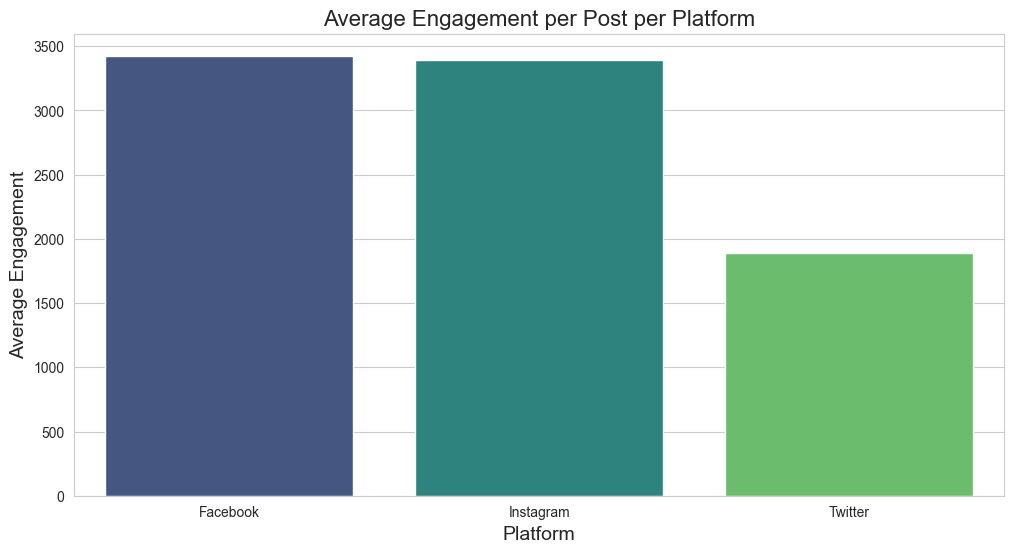

In [5]:
# Ensure the 'avg_engagement' column is numeric
platform_stats['avg_engagement'] = pd.to_numeric(platform_stats['avg_engagement'], errors='coerce')

# Drop rows with NaN values in 'avg_engagement' or 'platform' columns
platform_stats = platform_stats.dropna(subset=['avg_engagement', 'platform'])

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot of the average engagement per post per platform
sns.barplot(x='platform', y='avg_engagement', data=platform_stats, palette='viridis', ax=ax)

# Set the title and labels of the plot
ax.set_title('Average Engagement per Post per Platform', fontsize=16)
ax.set_xlabel('Platform', fontsize=14)
ax.set_ylabel('Average Engagement', fontsize=14)

# Show the plot
plt.show()

# Temporal Analysis

### Understanding the Problem

We will analyze how **social media post engagement** changes over **time** using the date and time columns to find the best posting times and identify trends. We aim to understand how engagement metrics like likes, comments, and shares vary over different time periods. This helps identify when posts get the most interaction, which can guide when to post for maximum impact. With date and time columns, we can analyze daily, weekly, and monthly patterns.

### Questions to Explore:

1. **Daily Patterns**: What are the peak hours for engagement?
2. **Weekly Patterns**: Are there specific days of the week that see higher engagement?
3. **Monthly Patterns**: How does engagement vary across different months?
4. **Seasonal Trends**: Are there any seasonal trends in engagement? We’ll look at monthly patterns to spot any seasonal highs or lows.
5. **Platform-Time Interaction**: How do different platforms perform at different times of the day or week?
6. **Posting Time and Engagment Correlation**: Does posting at certain times correlate with higher engagement?

### Steps to Perform the Analysis:

1. **Exploratory Data Analysis (EDA)**: Visualize engagement metrics over time using line plots, bar plots, and heatmaps.
2. **Pattern Identification**: Identify peak times for engagement and trends over different time periods.
3. **Comparison Across Platforms**: If data is available for multiple platforms, compare engagement patterns across them.
4. **Seasonal Decomposition**: Use time series decomposition to separate the trend, seasonal, and residual components of the data.
5. **Hypothesis Testing**: Conduct statistical tests to determine if observed patterns are significant.
6. **Reporting**: Summarize findings and create visualizations to communicate the insights effectively.

### Relevant Data:

1. **Engagement Metrics**: Likes, shares, comments, and views.
2. **Posting Timestamps**: The exact time when each post was published.
3. **Platform Information**: If data is available for multiple platforms (e.g., Facebook, Instagram, Twitter).


### Tools and Techniques:

- **Python Libraries**: Pandas, Matplotlib, Seaborn, Statsmodels, and Plotly.
- **Time Series Analysis**: ARIMA, SARIMA, and seasonal decomposition.
- **Statistical Tests**: T-tests, ANOVA, and Chi-square tests.
- **Visualization**: Line plots, bar plots, heatmaps, and box plots.


### Steps to Perform the Analysis:

1. **Data Combination**: Combine data from different files if necessary.


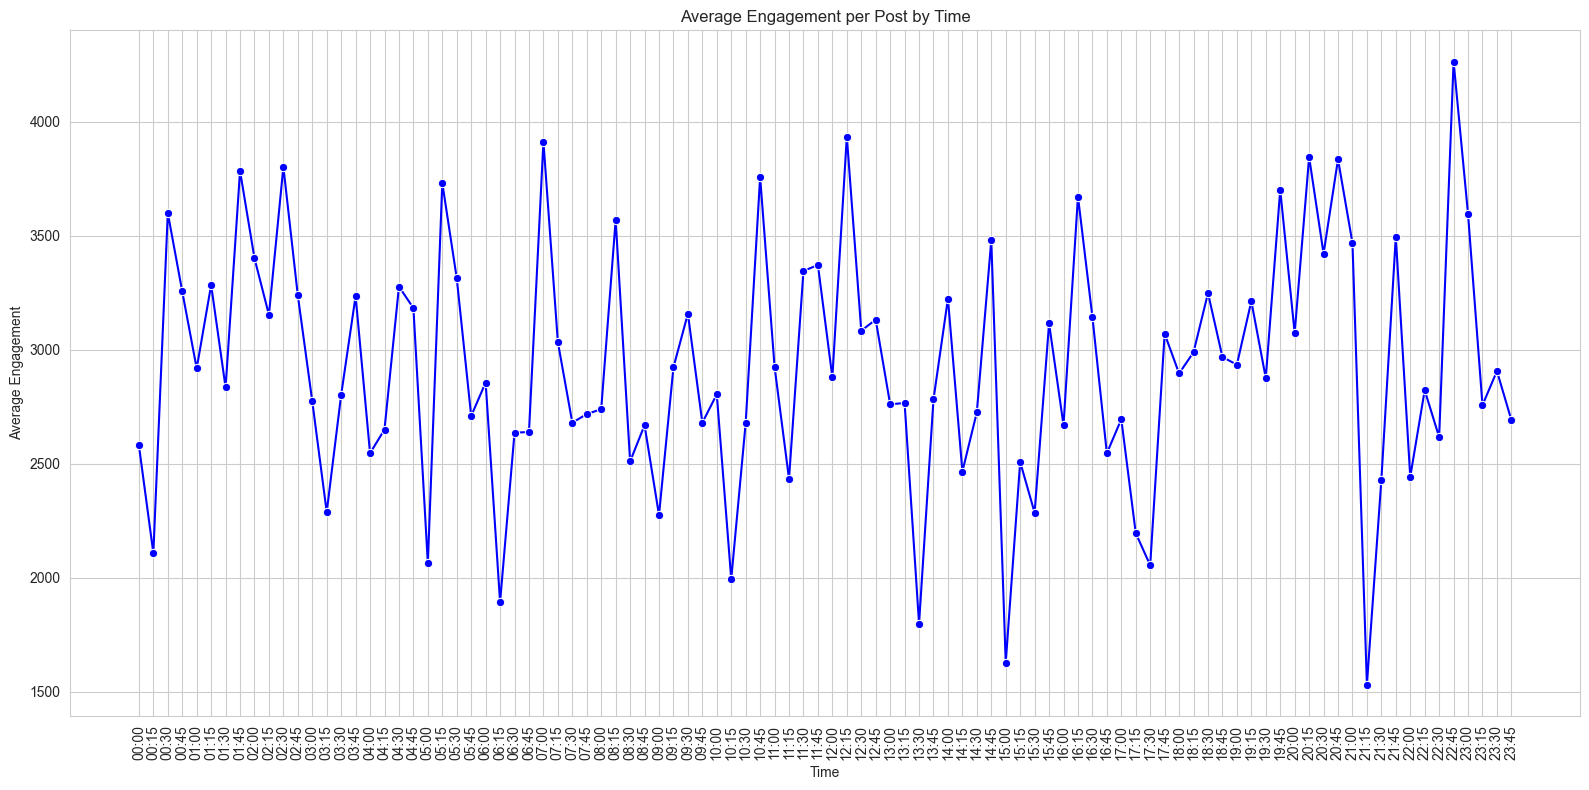

In [6]:
''' 1. Daily Patterns: What are the peak hours for engagement?'''

# Group by time and aggregate engagement metrics
peak_hours = df.groupby('time').agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()

# Calculate total engagement and average engagement per post
peak_hours['total_engagement'] = peak_hours['num_likes'] + peak_hours['num_comments'] + peak_hours['num_shares']
peak_hours['avg_engagement'] = (peak_hours['total_engagement'] / peak_hours['num_posts']).round(1)


# Convert the time column to datetime format and extract the hour
peak_hours['time'] = pd.to_datetime(peak_hours['time'], format='%I:%M %p').dt.strftime('%H:%M')

# Convert the avg_engagement column to numeric format
peak_hours['avg_engagement'] = pd.to_numeric(peak_hours['avg_engagement'])

# Sort the peak_hours DataFrame by time
peak_hours = peak_hours.sort_values('time')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the average engagement per post by time
sns.lineplot(x='time', y='avg_engagement', data=peak_hours, marker='o', color='blue', ax=ax)
ax.set_title('Average Engagement per Post by Time')
ax.set_xlabel('Time')
ax.set_ylabel('Average Engagement')
ax.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


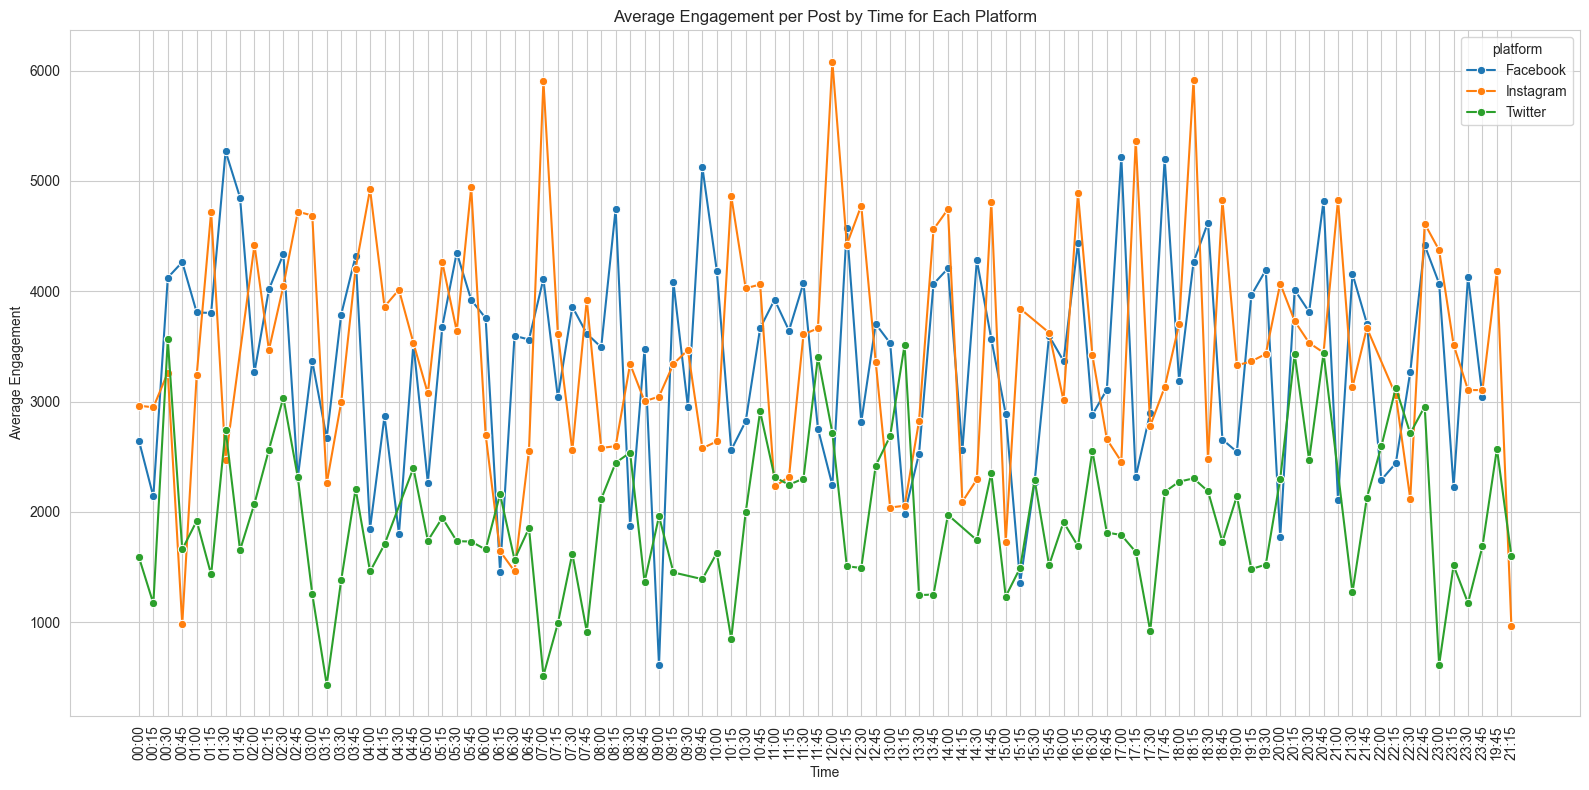

In [7]:
''' At what time is there peak engagement for each platform? '''

# Group by platform and time, and aggregate engagement metrics
platform_peak_hours = df.groupby(['platform', 'time']).agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()
# Calculate total engagement and average engagement per post for each platform
platform_peak_hours['total_engagement'] = platform_peak_hours['num_likes'] + platform_peak_hours['num_comments'] + platform_peak_hours['num_shares']
platform_peak_hours['avg_engagement'] = (platform_peak_hours['total_engagement'] / platform_peak_hours['num_posts']).round(1)
# Convert the time column to datetime format and extract the hour for sorting purposes
platform_peak_hours['time'] = pd.to_datetime(platform_peak_hours['time'], format='%I:%M %p').dt.strftime('%H:%M')
# Convert the avg_engagement column to numeric format
platform_peak_hours['avg_engagement'] = pd.to_numeric(platform_peak_hours['avg_engagement'])
# Sort the platform_peak_hours DataFrame by platform and time
platform_peak_hours = platform_peak_hours.sort_values(['platform', 'time'])
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16, 8))
# Plot the average engagement per post by time for each platform
sns.lineplot(x='time', y='avg_engagement', hue='platform', data=platform_peak_hours, marker='o', ax=ax)
ax.set_title('Average Engagement per Post by Time for Each Platform')
ax.set_xlabel('Time')
ax.set_ylabel('Average Engagement')
ax.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df.to_csv(r'C:\\Users\\EBUKA\\Documents\\Business Analysis Algorithm\\social_data\\social_media_engagement.csv', index=False)





Peak Engagement Time for Facebook:
time               01:30
avg_engagement    5269.0
Name: 4, dtype: object

Lowest Engagement Time for Facebook:
time              09:00
avg_engagement    613.0
Name: 63, dtype: object

Median Engagement per Post for Facebook: 3582.45
Mean Engagement per Post for Facebook: 3400.0
Median Time for Facebook: 14:45

Dispersion of Engagement for Facebook: 961.4
The standard deviation is high.


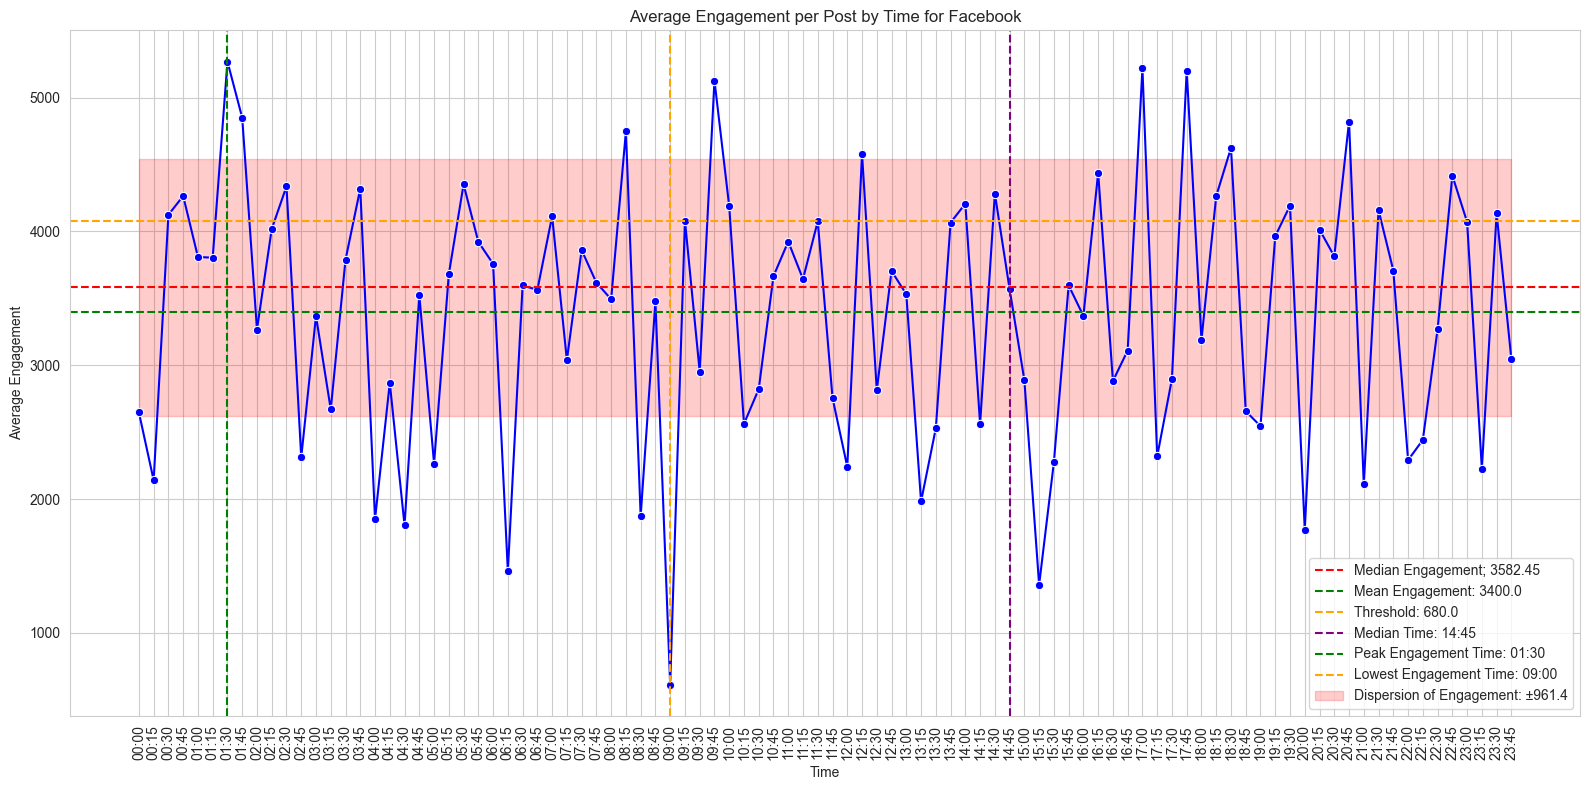

In [8]:
''' At what time is there peak and lowest engagement for Facebook? '''

# Filter the platform_peak_hours DataFrame for Facebook
facebook_peak_hours = platform_peak_hours[platform_peak_hours['platform'] == 'Facebook']

# Find the time with the highest and lowest average engagement for Facebook
peak_engagement_facebook = facebook_peak_hours.loc[facebook_peak_hours['avg_engagement'].idxmax()]
lowest_engagement_facebook = facebook_peak_hours.loc[facebook_peak_hours['avg_engagement'].idxmin()]
median_engagement_facebook = facebook_peak_hours['avg_engagement'].median()
mean_engagement_facebook = facebook_peak_hours['avg_engagement'].mean().round(1)
median_time_facebook = facebook_peak_hours.loc[facebook_peak_hours['avg_engagement'].sub(median_engagement_facebook).abs().idxmin()]['time']
dispersion_facebook = facebook_peak_hours['avg_engagement'].std().round(1)

# Print the peak and lowest engagement times for Facebook
print("Peak Engagement Time for Facebook:")
print(peak_engagement_facebook[['time', 'avg_engagement']])
print("\nLowest Engagement Time for Facebook:")
print(lowest_engagement_facebook[['time', 'avg_engagement']])

# Print the median and mean engagement per post for Facebook
print("\nMedian Engagement per Post for Facebook:", median_engagement_facebook)
print("Mean Engagement per Post for Facebook:", mean_engagement_facebook)
print("Median Time for Facebook:", median_time_facebook)

# Print the dispersion of engagement for Facebook
print("\nDispersion of Engagement for Facebook:", dispersion_facebook)

# Determine if the standard deviation is high or low
threshold = 0.2  # 20% threshold
if dispersion_facebook > threshold * mean_engagement_facebook:
    print("The standard deviation is high.")
else:
    print("The standard deviation is low.")

# Sort the facebook_peak_hours DataFrame by time
facebook_peak_hours = facebook_peak_hours.sort_values('time')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the average engagement per post by time for Facebook
sns.lineplot(x='time', y='avg_engagement', data=facebook_peak_hours, marker='o', color='blue', ax=ax)
ax.set_title('Average Engagement per Post by Time for Facebook')
ax.set_xlabel('Time')
ax.set_ylabel('Average Engagement')
ax.grid(True)

# Add a horizontal line for the median engagement per post for Facebook
ax.axhline(y=median_engagement_facebook, color='r', linestyle='--', label=f'Median Engagement; {median_engagement_facebook}')

# Add a horizontal line for the mean engagement per post for Facebook
ax.axhline(y=mean_engagement_facebook, color='g', linestyle='--', label=f'Mean Engagement: {mean_engagement_facebook}')

# Add a horizontal line for the threshold
ax.axhline(y=mean_engagement_facebook + threshold * mean_engagement_facebook, color='orange', linestyle='--', label=f'Threshold: {threshold * mean_engagement_facebook}')

# Add a vertical line for the median time for Facebook
ax.axvline(x=median_time_facebook, color='purple', linestyle='--', label=f'Median Time: {median_time_facebook}')

# Add a vertical line for the peak engagement time for Facebook
ax.axvline(x=peak_engagement_facebook['time'], color='g', linestyle='--', label=f'Peak Engagement Time: {peak_engagement_facebook["time"]}')

# Add a vertical line for the lowest engagement time for Facebook
ax.axvline(x=lowest_engagement_facebook['time'], color='orange', linestyle='--', label=f'Lowest Engagement Time: {lowest_engagement_facebook["time"]}')

# Show dispersion of engagement for Facebook as a shaded area around the median line
ax.fill_between(facebook_peak_hours['time'], median_engagement_facebook - dispersion_facebook, median_engagement_facebook + dispersion_facebook, color='r', alpha=0.2, label=f'Dispersion of Engagement: ±{dispersion_facebook}')

plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

facebook_peak_hours.to_csv(r'C:\\Users\\EBUKA\\Documents\\Business Analysis Algorithm\\social_data\\facebook_peak_hours.csv', index=False)


Peak Engagement Time for Instagram:
time               12:00
avg_engagement    6082.0
Name: 180, dtype: object

Lowest Engagement Time for Instagram:
time              21:15
avg_engagement    968.0
Name: 159, dtype: object

Median Engagement per Post for Instagram: 3432.2
Mean Engagement per Post for Instagram: 3471.5
Median Time for Instagram: 19:30

Dispersion of Engagement for Instagram: 1051.6
The standard deviation is high.


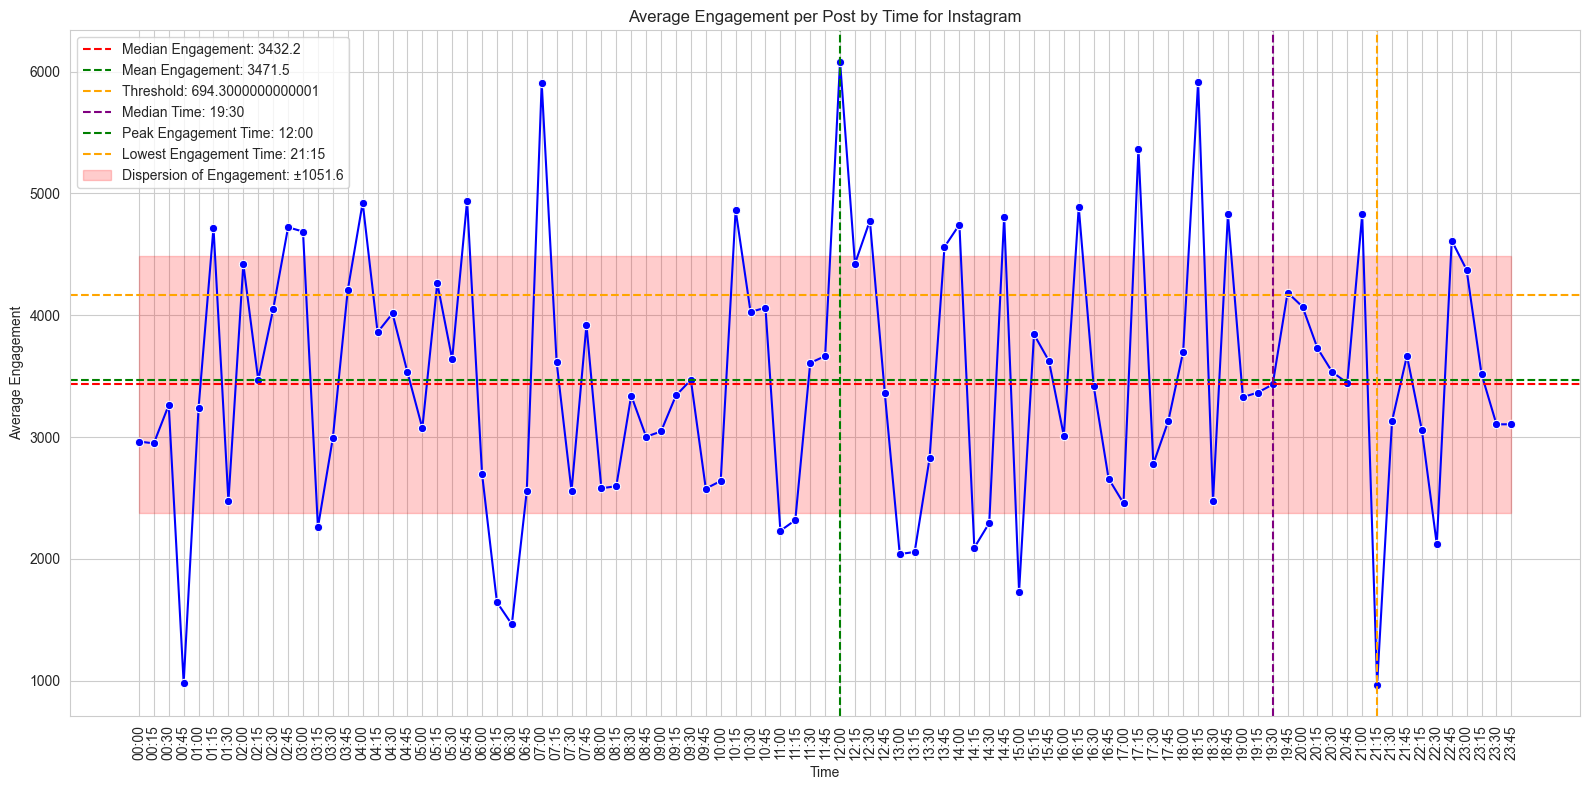

In [9]:
'''At what time is there peak and lowest engagement for Instagram?'''

# Filter the platform_peak_hours DataFrame for Instagram
instagram_peak_hours = platform_peak_hours[platform_peak_hours['platform'] == 'Instagram']

# Find the time with the highest and lowest average engagement for Instagram
peak_engagement_instagram = instagram_peak_hours.loc[instagram_peak_hours['avg_engagement'].idxmax()]
lowest_engagement_instagram = instagram_peak_hours.loc[instagram_peak_hours['avg_engagement'].idxmin()]
median_engagement_instagram = instagram_peak_hours['avg_engagement'].median()
mean_engagement_instagram = instagram_peak_hours['avg_engagement'].mean().round(1)
median_time_instagram = instagram_peak_hours.loc[instagram_peak_hours['avg_engagement'].sub(median_engagement_instagram).abs().idxmin()]['time']
dispersion_instagram = instagram_peak_hours['avg_engagement'].std().round(1)

# Print the peak and lowest engagement times for Instagram
print("\nPeak Engagement Time for Instagram:")
print(peak_engagement_instagram[['time', 'avg_engagement']])
print("\nLowest Engagement Time for Instagram:")
print(lowest_engagement_instagram[['time', 'avg_engagement']])

# Print the median and mean engagement per post for Instagram
print("\nMedian Engagement per Post for Instagram:", median_engagement_instagram)
print("Mean Engagement per Post for Instagram:", mean_engagement_instagram)
print("Median Time for Instagram:", median_time_instagram)

# Print the dispersion of engagement for Instagram
print("\nDispersion of Engagement for Instagram:", dispersion_instagram)

# Determine if the standard deviation is high or low
threshold = 0.2  # 20% threshold for high dispersion
if dispersion_instagram > threshold * mean_engagement_instagram:
    print("The standard deviation is high.")
else:    
    print("The standard deviation is low.")

# Sort the instagram_peak_hours DataFrame by time
instagram_peak_hours = instagram_peak_hours.sort_values('time')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the average engagement per post by time for Instagram
sns.lineplot(x='time', y='avg_engagement', data=instagram_peak_hours, marker='o', color='blue', ax=ax)
ax.set_title('Average Engagement per Post by Time for Instagram')
ax.set_xlabel('Time')
ax.set_ylabel('Average Engagement')
#ax.set_xticks(range(0, 24))  # Set x-ticks to show every hour
ax.grid(True)

# Add a horizontal line for the median engagement per post for Instagram
ax.axhline(y=median_engagement_instagram, color='r', linestyle='--', label=f'Median Engagement: {median_engagement_instagram}')

# Add a horizontal line for the mean engagement per post for Instagram
ax.axhline(y=mean_engagement_instagram, color='g', linestyle='--', label=f'Mean Engagement: {mean_engagement_instagram}')

# Add a horizontal line for the threshold
ax.axhline(y=mean_engagement_instagram + threshold * mean_engagement_instagram, color='orange', linestyle='--', label=f'Threshold: {threshold * mean_engagement_instagram}')

# Add a vertical line for the median time for Instagram
ax.axvline(x=median_time_instagram, color='purple', linestyle='--', label=f'Median Time: {median_time_instagram}')

# Add a vertical line for the peak engagement time for Instagram
ax.axvline(x=peak_engagement_instagram['time'], color='g', linestyle='--', label=f'Peak Engagement Time: {peak_engagement_instagram["time"]}')

# Add a vertical line for the lowest engagement time for Instagram
ax.axvline(x=lowest_engagement_instagram['time'], color='orange', linestyle='--', label=f'Lowest Engagement Time: {lowest_engagement_instagram["time"]}')

# Show dispersion of engagement for Instagram as a shaded area around the median line
ax.fill_between(instagram_peak_hours['time'], median_engagement_instagram - dispersion_instagram, median_engagement_instagram + dispersion_instagram, color='r', alpha=0.2, label=f'Dispersion of Engagement: ±{dispersion_instagram}')

plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

instagram_peak_hours.to_csv(r'C:\\Users\\EBUKA\\Documents\\Business Analysis Algorithm\\social_data\\instagram_peak_hours.csv', index=False)

Peak Engagement Time for Twitter:
time               00:30
avg_engagement    3563.5
Name: 275, dtype: object

Lowest Engagement Time for Twitter:
time              03:15
avg_engagement    435.0
Name: 204, dtype: object

Median Engagement per Post for Twitter: 1833.45
Mean Engagement per Post for Twitter: 1947.3
Median Time for Twitter: 06:45

Dispersion of Engagement for Twitter: 673.5
The standard deviation is high.


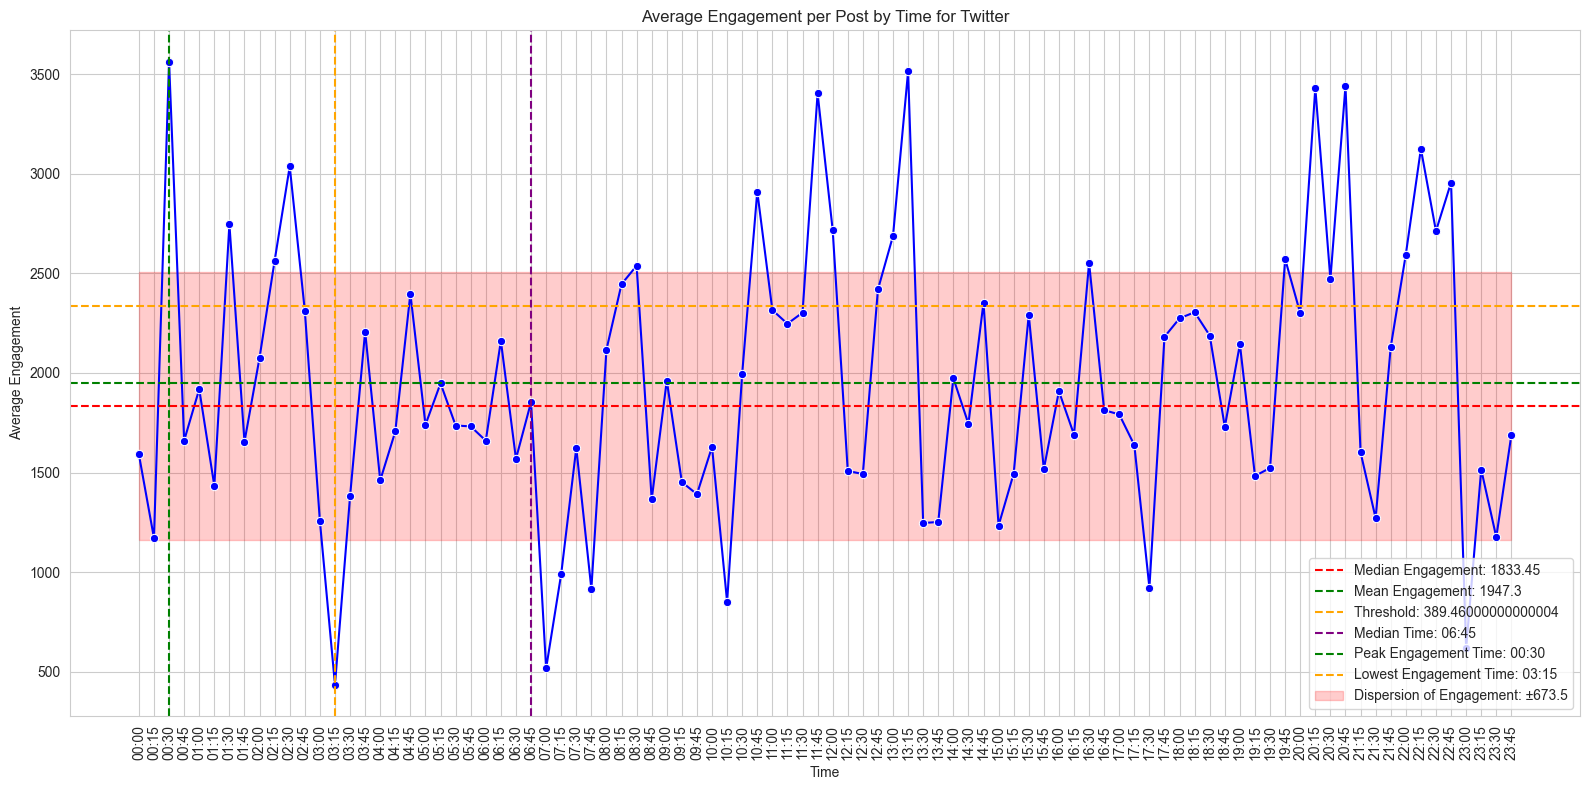

In [10]:
''' At what time is there peak and lowest engagement for Twitter? '''

# Filter the platform_peak_hours DataFrame for Twitter
twitter_peak_hours = platform_peak_hours[platform_peak_hours['platform'] == 'Twitter']

# Find the time with the highest and lowest average engagement for Twitter
peak_engagement_twitter = twitter_peak_hours.loc[twitter_peak_hours['avg_engagement'].idxmax()]
lowest_engagement_twitter = twitter_peak_hours.loc[twitter_peak_hours['avg_engagement'].idxmin()]
median_engagement_twitter = twitter_peak_hours['avg_engagement'].median()
mean_engagement_twitter = twitter_peak_hours['avg_engagement'].mean().round(1)
median_time_twitter = twitter_peak_hours.loc[twitter_peak_hours['avg_engagement'].sub(median_engagement_twitter).abs().idxmin()]['time']
dispersion_twitter = twitter_peak_hours['avg_engagement'].std().round(1)

# Print the peak and lowest engagement times for Twitter
print("Peak Engagement Time for Twitter:")
print(peak_engagement_twitter[['time', 'avg_engagement']])
print("\nLowest Engagement Time for Twitter:")
print(lowest_engagement_twitter[['time', 'avg_engagement']])

# Print the median and mean engagement per post for Twitter
print("\nMedian Engagement per Post for Twitter:", median_engagement_twitter)
print("Mean Engagement per Post for Twitter:", mean_engagement_twitter)
print("Median Time for Twitter:", median_time_twitter)

# Print the dispersion of engagement for Twitter
print("\nDispersion of Engagement for Twitter:", dispersion_twitter)

# Determine if the standard deviation is high or low
threshold = 0.2  # 20% threshold
if dispersion_twitter > threshold * mean_engagement_twitter:
    print("The standard deviation is high.")
else:
    print("The standard deviation is low.")

# Sort the twitter_peak_hours DataFrame by time
twitter_peak_hours = twitter_peak_hours.sort_values('time')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the average engagement per post by time for Twitter
sns.lineplot(x='time', y='avg_engagement', data=twitter_peak_hours, marker='o', color='blue', ax=ax)
ax.set_title('Average Engagement per Post by Time for Twitter')
ax.set_xlabel('Time')
ax.set_ylabel('Average Engagement')
ax.grid(True)

# Add a horizontal line for the median engagement per post for Twitter
ax.axhline(y=median_engagement_twitter, color='r', linestyle='--', label=f'Median Engagement: {median_engagement_twitter}')

# Add a horizontal line for the mean engagement per post for Twitter
ax.axhline(y=mean_engagement_twitter, color='g', linestyle='--', label=f'Mean Engagement: {mean_engagement_twitter}')

# Add a horizontal line for the threshold
ax.axhline(y=mean_engagement_twitter + threshold * mean_engagement_twitter, color='orange', linestyle='--', label=f'Threshold: {threshold * mean_engagement_twitter}')

# Add a vertical line for the median time for Twitter
ax.axvline(x=median_time_twitter, color='purple', linestyle='--', label=f'Median Time: {median_time_twitter}')

# Add a vertical line for the peak engagement time for Twitter
ax.axvline(x=peak_engagement_twitter['time'], color='g', linestyle='--', label=f'Peak Engagement Time: {peak_engagement_twitter["time"]}')

# Add a vertical line for the lowest engagement time for Twitter
ax.axvline(x=lowest_engagement_twitter['time'], color='orange', linestyle='--', label=f'Lowest Engagement Time: {lowest_engagement_twitter["time"]}')

# Show dispersion of engagement for Twitter as a shaded area around the median line
ax.fill_between(twitter_peak_hours['time'], median_engagement_twitter - dispersion_twitter, median_engagement_twitter + dispersion_twitter, color='r', alpha=0.2, label=f'Dispersion of Engagement: ±{dispersion_twitter}')

plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

twitter_peak_hours.to_csv(r'C:\\Users\\EBUKA\\Documents\\Business Analysis Algorithm\\social_data\\twitter_peak_hours.csv', index=False)

C:\Users\EBUKA\AppData\Local\Temp\ipykernel_21156\4187461750.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='post_day', y='total_engagement', data=daily_engagement, palette='viridis', ax=ax)


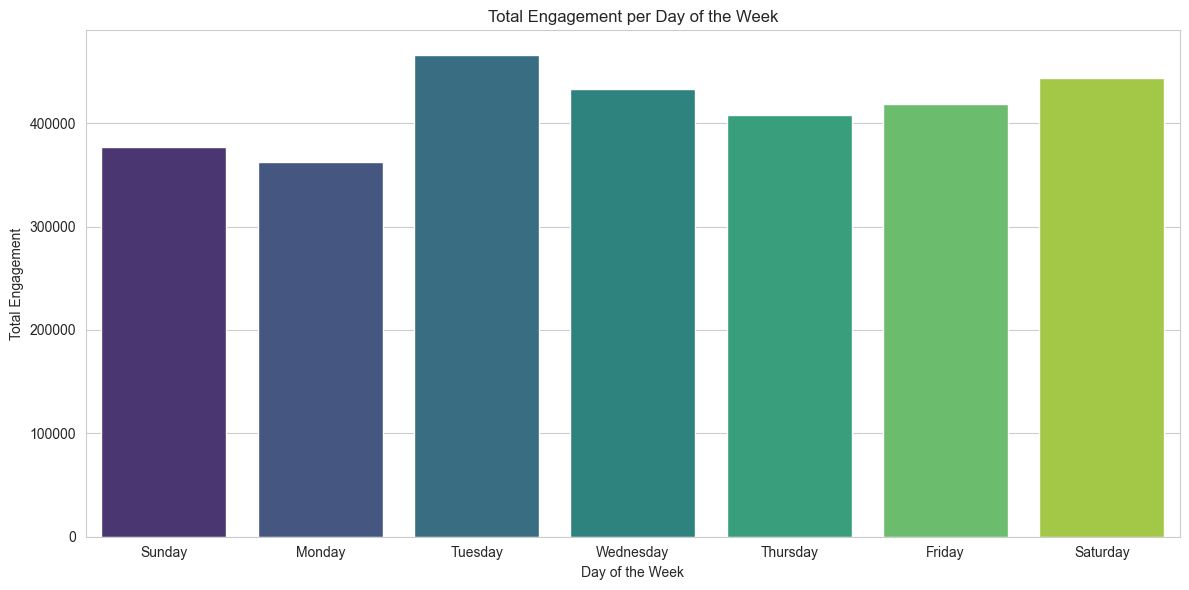

In [11]:
'''Are there specific days of the week that see higher engagement?
List variables to be used for this analysis:
- post_day
- num_likes, num_comments, num_shares,num_posts
- total_engagement
- avg_engagement
''' 

# Group by post_day and aggregate engagement metrics
daily_engagement = df.groupby('post_day').agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()

# Calculate total engagement and average engagement per post
daily_engagement['total_engagement'] = daily_engagement['num_likes'] + daily_engagement['num_comments'] + daily_engagement['num_shares']
daily_engagement['avg_engagement'] = (daily_engagement['total_engagement'] / daily_engagement['num_posts']).round(1)

# Sort the daily_engagement DataFrame by post_day (Sunday to Saturday)
daily_engagement = daily_engagement.sort_values('post_day', key=lambda x: pd.Categorical(x, categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True))


# Display the daily_engagement DataFrame
daily_engagement.head(7)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the total engagement per day of the week
sns.barplot(x='post_day', y='total_engagement', data=daily_engagement, palette='viridis', ax=ax)
# Set plot title and labels
ax.set_title('Total Engagement per Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Engagement')
plt.tight_layout()
plt.show()

daily_engagement.to_csv(r'C:\\Users\\EBUKA\\Documents\\Business Analysis Algorithm\\social_data\\daily_engagement.csv', index=False)

C:\Users\EBUKA\AppData\Local\Temp\ipykernel_21156\2652596047.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='post_month', y='total_engagement', data=monthly_engagement, palette='viridis', ax=ax)


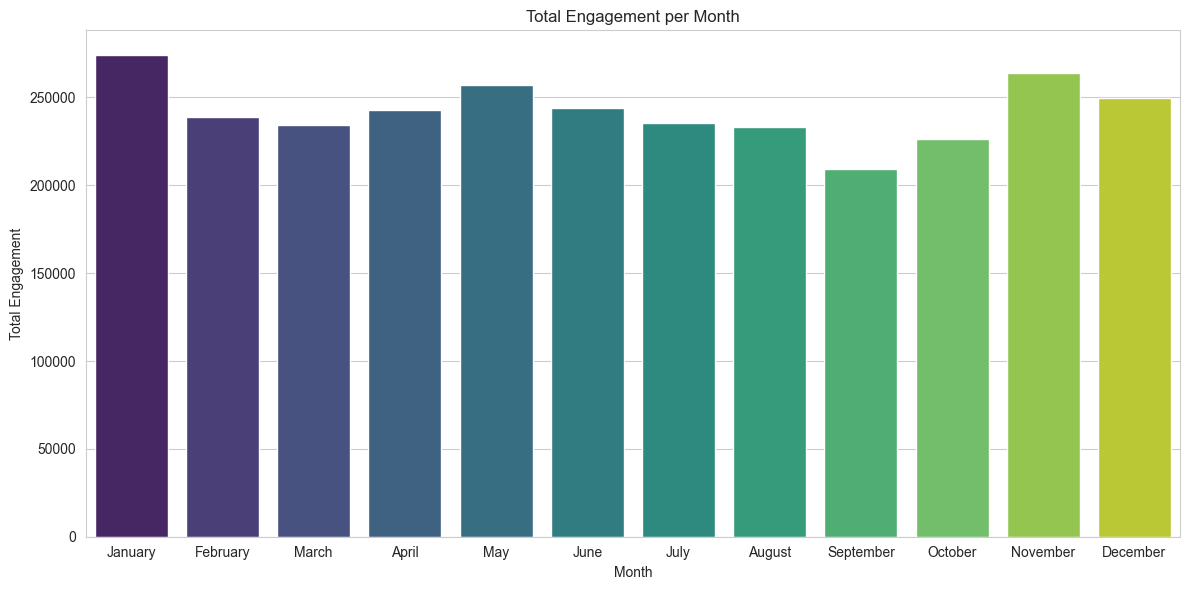

In [12]:
'''How does engagement vary across different months?'''

# Extract the month from the date column
df['post_month'] = pd.to_datetime(df['date'], format='%d-%m-%Y').dt.strftime('%B')

# Group by month and calculate total engagement and average engagement per post
monthly_engagement = df.groupby('post_month').agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()

# Calculate total engagement and average engagement per post for each month
monthly_engagement['total_engagement'] = monthly_engagement['num_likes'] + monthly_engagement['num_comments'] + monthly_engagement['num_shares']
monthly_engagement['avg_engagement'] = (monthly_engagement['total_engagement'] / monthly_engagement['num_posts']).round(1)

# Sort the monthly_engagement DataFrame by month
monthly_engagement = monthly_engagement.sort_values('post_month', key=lambda x: pd.Categorical(x, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True))

# Display the monthly_engagement DataFrame
monthly_engagement.head(12)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the total engagement per month
sns.barplot(x='post_month', y='total_engagement', data=monthly_engagement, palette='viridis', ax=ax)

# Add labels and title to the plot
ax.set_title('Total Engagement per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Engagement')
plt.tight_layout()
plt.show()

monthly_engagement.to_csv(r'C:\\Users\\EBUKA\\Documents\\Business Analysis Algorithm\\social_data\\monthly_engagement.csv', index=False)


C:\Users\EBUKA\AppData\Local\Temp\ipykernel_21156\2666831292.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_engagement = hourly_engagement.groupby('time_of_day').agg(


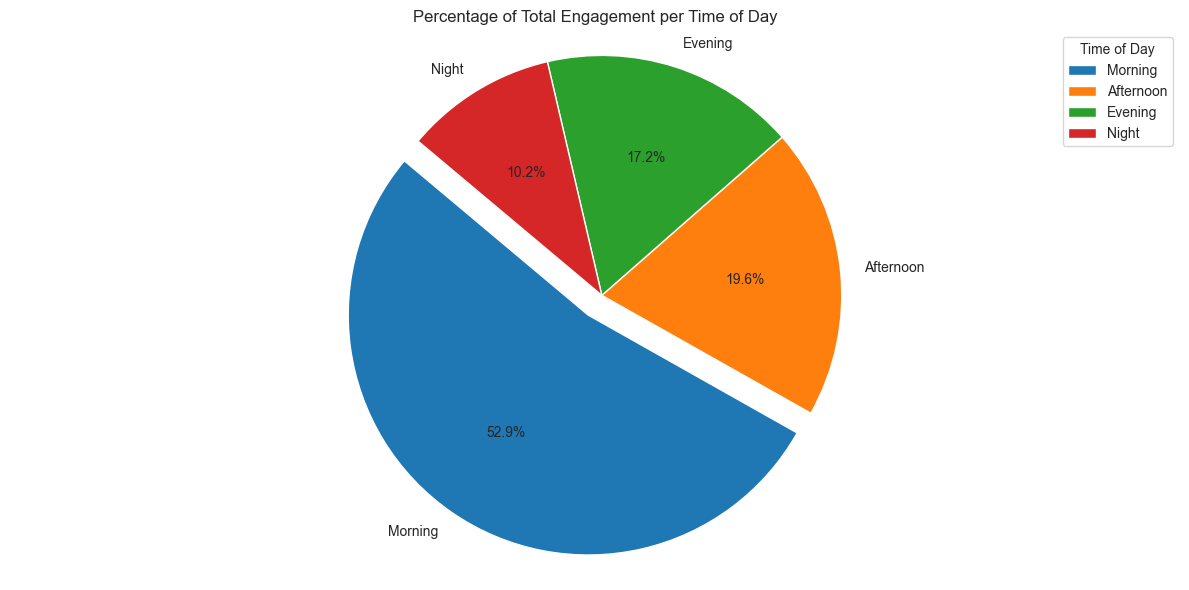

In [13]:
'''What percentage of our total engagement occurs during each hour of the day?'''

# Group by time and calculate total engagement
hourly_engagement = df.groupby('time').agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()

# Calculate total engagement and percentage of total engagement per hour
hourly_engagement['total_engagement'] = hourly_engagement['num_likes'] + hourly_engagement['num_comments'] + hourly_engagement['num_shares']
hourly_engagement['percentage_engagement'] = (hourly_engagement['total_engagement'] / hourly_engagement['total_engagement'].sum()) * 100

# Convert the 'time' column to datetime format
hourly_engagement['time'] = pd.to_datetime(hourly_engagement['time'], format='%I:%M %p').dt.time

# Sort by time to maintain chronological order
hourly_engagement = hourly_engagement.sort_values('time')

# Group time into morning, afternoon, evening, and night categories
hourly_engagement['time_of_day'] = pd.cut(hourly_engagement['time'].apply(lambda x: x.hour), bins=[0, 12, 17, 21, 24], labels=['Morning', 'Afternoon', 'Evening', 'Night'], right=False)

# Group by time_of_day
hourly_engagement = hourly_engagement.groupby('time_of_day').agg(
    num_posts=('num_posts', 'sum'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum'),
    total_engagement=('total_engagement', 'sum'),
    percentage_engagement=('percentage_engagement', 'sum')
).reset_index()

# Plot a pie chart of the percentage of total engagement per time of day
fig, ax = plt.subplots(figsize=(12, 6))

# Create a 3d pie chart
ax.pie(hourly_engagement['percentage_engagement'], labels=hourly_engagement['time_of_day'], autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0, 0), shadow=False) 

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set title and show plot
ax.set_title('Percentage of Total Engagement per Time of Day')
ax.legend(title='Time of Day', loc='upper right')
plt.tight_layout()
plt.show()

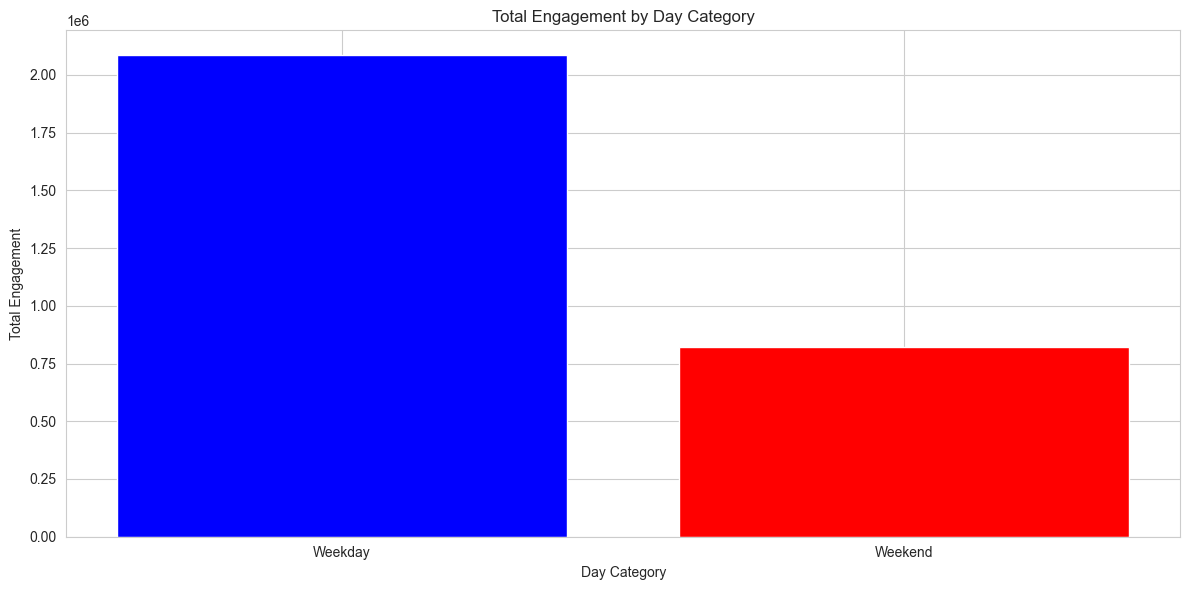

In [14]:
'''Is there a noticeable difference between weekday and weekend engagement?'''

# Group by day of the week and calculate total engagement
daily_engagement = df.groupby('post_day').agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()

# Sort the daily_engagement DataFrame by post_day (Sunday to Saturday)
daily_engagement = daily_engagement.sort_values('post_day', key=lambda x: pd.Categorical(x, categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True))

# Calculate total engagement and average engagement per post for each day of the week
daily_engagement['total_engagement'] = daily_engagement['num_likes'] + daily_engagement['num_comments'] + daily_engagement['num_shares']
daily_engagement['avg_engagement'] = (daily_engagement['total_engagement'] / daily_engagement['num_posts']).round(1)

# Group days into weekday and weekend categories
daily_engagement['day_category'] = daily_engagement['post_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group by day_category and calculate total engagement and average engagement per post for each category
category_engagement = daily_engagement.groupby('day_category').agg(
    total_engagement=('total_engagement', 'sum'),
    avg_engagement=('avg_engagement', 'mean')
).reset_index()

# Display the category_engagement DataFrame
category_engagement.head(2)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the total engagement for each category as a bar plot
ax.bar(category_engagement['day_category'], category_engagement['total_engagement'], color=['blue', 'red'])

# Set title and labels
ax.set_title('Total Engagement by Day Category')
ax.set_xlabel('Day Category')
ax.set_ylabel('Total Engagement')
plt.tight_layout()
plt.show()

Average Engagement Rate for Morning Posts (7-9am): 2977.6
Average Engagement Rate for Evening Posts (7-9pm): 3348.3


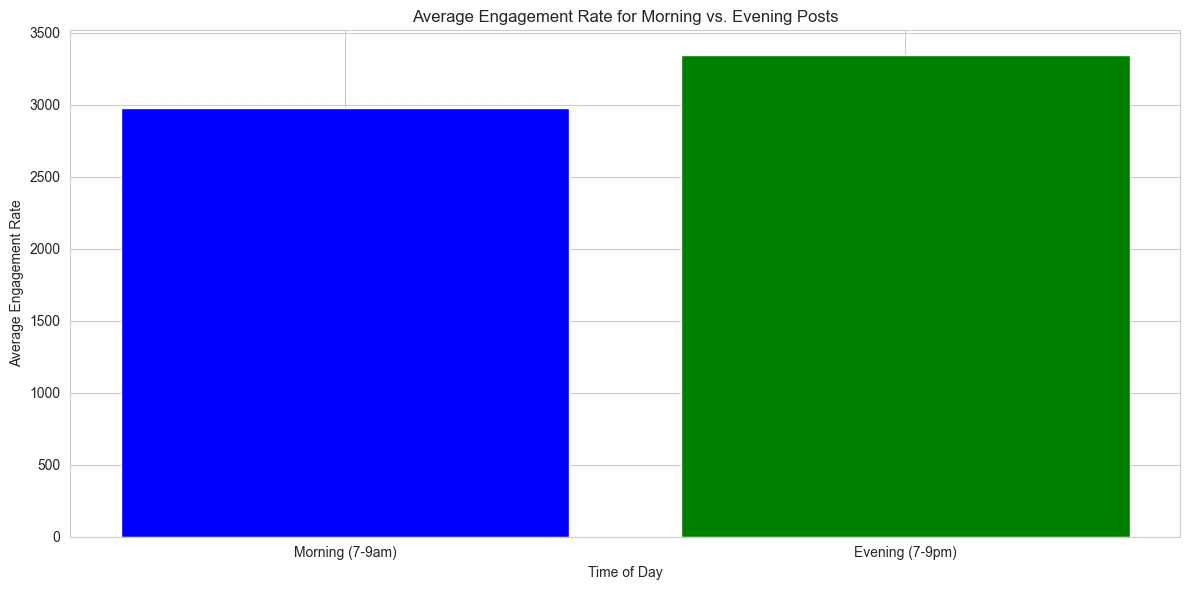

In [15]:
'''What is the average engagement rate for content posted between 7-9am versus 7-9pm?'''

# Group by post_hour and calculate total engagement
hourly_engagement = df.groupby('post_hour').agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()

# Calculate total engagement
hourly_engagement['total_engagement'] = hourly_engagement['num_likes'] + hourly_engagement['num_comments'] + hourly_engagement['num_shares']

# Filter the DataFrame for posts between 7-9am and 7-9pm
morning_posts = hourly_engagement[(hourly_engagement['post_hour'] >= 7) & (hourly_engagement['post_hour'] < 9)]
evening_posts = hourly_engagement[(hourly_engagement['post_hour'] >= 19) & (hourly_engagement['post_hour'] < 21)]

# Calculate the average engagement rate for morning and evening posts
morning_avg_engagement = (morning_posts['total_engagement'].sum() / morning_posts['num_posts'].sum()).round(1)
evening_avg_engagement = (evening_posts['total_engagement'].sum() / evening_posts['num_posts'].sum()).round(1)

# Print the average engagement rate for morning and evening posts
print("Average Engagement Rate for Morning Posts (7-9am):", morning_avg_engagement)
print("Average Engagement Rate for Evening Posts (7-9pm):", evening_avg_engagement)

# Create a bar plot to compare the average engagement rates
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(['Morning (7-9am)', 'Evening (7-9pm)'], [morning_avg_engagement, evening_avg_engagement], color=['blue', 'green'])

# Set title and labels
ax.set_title('Average Engagement Rate for Morning vs. Evening Posts')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Average Engagement Rate')
plt.tight_layout()
plt.show()

Content Type Engagement: 

  post_type  num_posts  num_likes  num_comments  num_shares  total_engagement  \
0  carousel        207     453825         44747       83156            581728   
1     image        193     465664         44711       81517            591892   
2      poll        212     506662         45162       96512            648336   
3      text        205     308767         36875       83540            429182   
4     video        183     535133         46752       76085            657970   

   avg_engagement_per_post day_of_week  
0              2810.280193    Thursday  
1              3066.797927      Sunday  
2              3058.188679     Tuesday  
3              2093.570732    Thursday  
4              3595.464481     Tuesday  


C:\Users\EBUKA\AppData\Local\Temp\ipykernel_21156\1705959674.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='post_type', y='avg_engagement_per_post', data=content_type_engagement, palette='viridis', ax=ax)


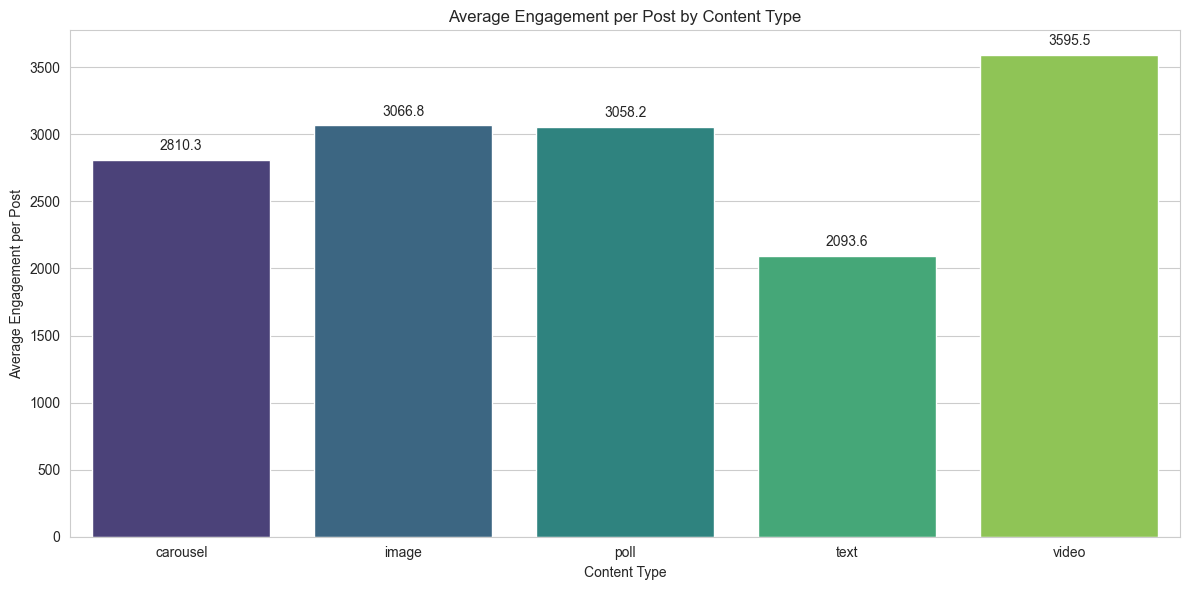

In [16]:
'''Content Type Analysis'''

# Group by post_type and calculate total engagement
content_type_engagement = df.groupby('post_type').agg(
    num_posts=('post_id', 'count'),
    num_likes=('num_likes', 'sum'),
    num_comments=('num_comments', 'sum'),
    num_shares=('num_shares', 'sum')
).reset_index()

# Calculate total engagement and average engagement per post for each content type
content_type_engagement['total_engagement'] = content_type_engagement['num_likes'] + content_type_engagement['num_comments'] + content_type_engagement['num_shares']
content_type_engagement['avg_engagement_per_post'] = content_type_engagement['total_engagement'] / content_type_engagement['num_posts']

content_type_engagement['day_of_week'] = pd.to_datetime(df['date'], format='%d-%m-%Y').dt.day_name()

# Print the content type engagement data
print('Content Type Engagement:', '\n')
print(content_type_engagement.head(8))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average engagement per post by content type
sns.barplot(x='post_type', y='avg_engagement_per_post', data=content_type_engagement, palette='viridis', ax=ax)

# Set title and labels
ax.set_title('Average Engagement per Post by Content Type')
ax.set_xlabel('Content Type')
ax.set_ylabel('Average Engagement per Post')

# Annotate the bars with the average engagement values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    

plt.tight_layout()
plt.show()



In [17]:
# Do a table that counts the number of post types across each day of week
day_of_week_post_type = df.groupby(['day_of_week', 'post_type']).size().unstack().fillna(0)

# Calculate engagement metrics for each post type
day_of_week_post_type['total_posts'] = day_of_week_post_type.sum(axis=1)
day_of_week_post_type['total_likes'] = df.groupby('day_of_week')['num_likes'].sum()
day_of_week_post_type['total_comments'] = df.groupby('day_of_week')['num_comments'].sum()
day_of_week_post_type['total_shares'] = df.groupby('day_of_week')['num_shares'].sum()
day_of_week_post_type['total_engagement'] = day_of_week_post_type['total_likes'] + day_of_week_post_type['total_comments'] + day_of_week_post_type['total_shares']
day_of_week_post_type['avg_engagement_per_post'] = day_of_week_post_type['total_engagement'] / day_of_week_post_type['total_posts']

# Sort from Sunday to Saturday
day_of_week_post_type = day_of_week_post_type.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot the total posts by day of week and post type
fig, ax = plt.subplots(figsize=(12, 6))
bars = day_of_week_post_type['total_posts'].plot(kind='bar', stacked=True, ax=ax)

# Add text annotations to each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

ax.set_title('Total Posts by Day of Week and Post Type')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Posts')
ax.grid(True)
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

# Print the table of post types by day of week
day_of_week_post_type.head(7)

KeyError: 'day_of_week'

C:\Users\EBUKA\AppData\Local\Temp\ipykernel_5700\387866654.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  carousel_posts['day_of_week'] = pd.to_datetime(carousel_posts['date']).dt.day_name()
C:\Users\EBUKA\AppData\Local\Temp\ipykernel_5700\387866654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carousel_posts['day_of_week'] = pd.to_datetime(carousel_posts['date']).dt.day_name()


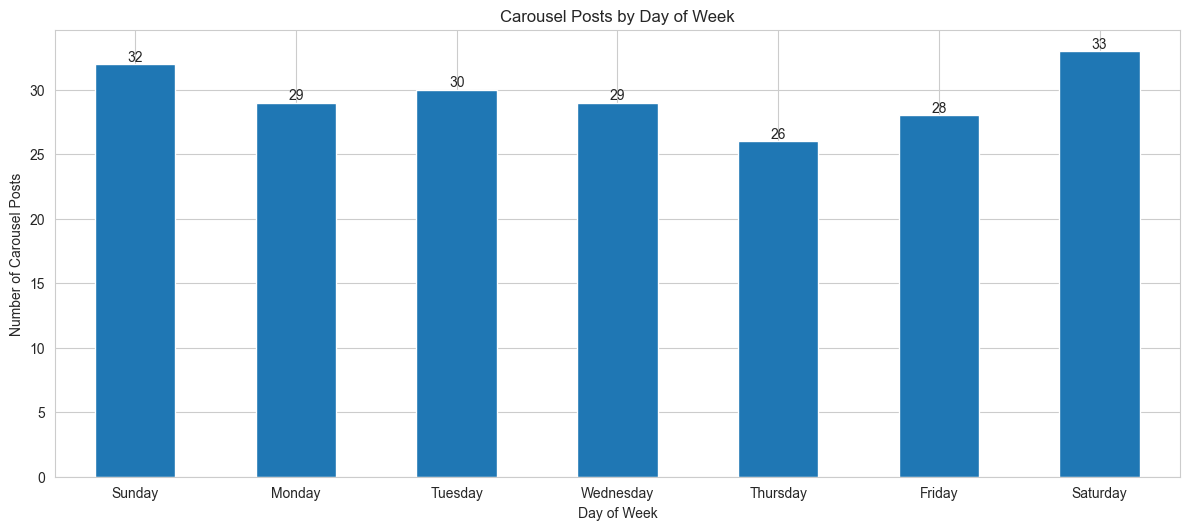

In [ ]:
'''Find out distribution of carousel across each day of the week'''

# Filter the DataFrame for carousel posts
carousel_posts = df[df['post_type'] == 'carousel']

# Extract the day of the week from the date column
carousel_posts['day_of_week'] = pd.to_datetime(carousel_posts['date']).dt.day_name()

# Group by day of the week and count the number of carousel posts
carousel_count_by_day = carousel_posts['day_of_week'].value_counts().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot carousel count vs day of week
fig, ax = plt.subplots(figsize=(12, 6))
bars = carousel_count_by_day.plot(kind='bar', ax=ax)

# Add text annotations to each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

ax.set_title('Carousel Posts by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Carousel Posts')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

Engagement metrics for carousel post for each day of the week 

  day_of_week  total_likes  total_comments  total_shares  total_engagement  \
3      Sunday        84770            7717         13755            106242   
1      Monday        52523            6312         10914             69749   
5     Tuesday        68670            6419         12066             87155   
6   Wednesday        65160            5400         12176             82736   
4    Thursday        58146            5102          9071             72319   
0      Friday        52499            5576         12240             70315   
2    Saturday        72057            8221         12934             93212   

   avg_engagement_per_post  
3              3320.062500  
1              2405.137931  
5              2905.166667  
6              2852.965517  
4              2781.500000  
0              2511.250000  
2              2824.606061  


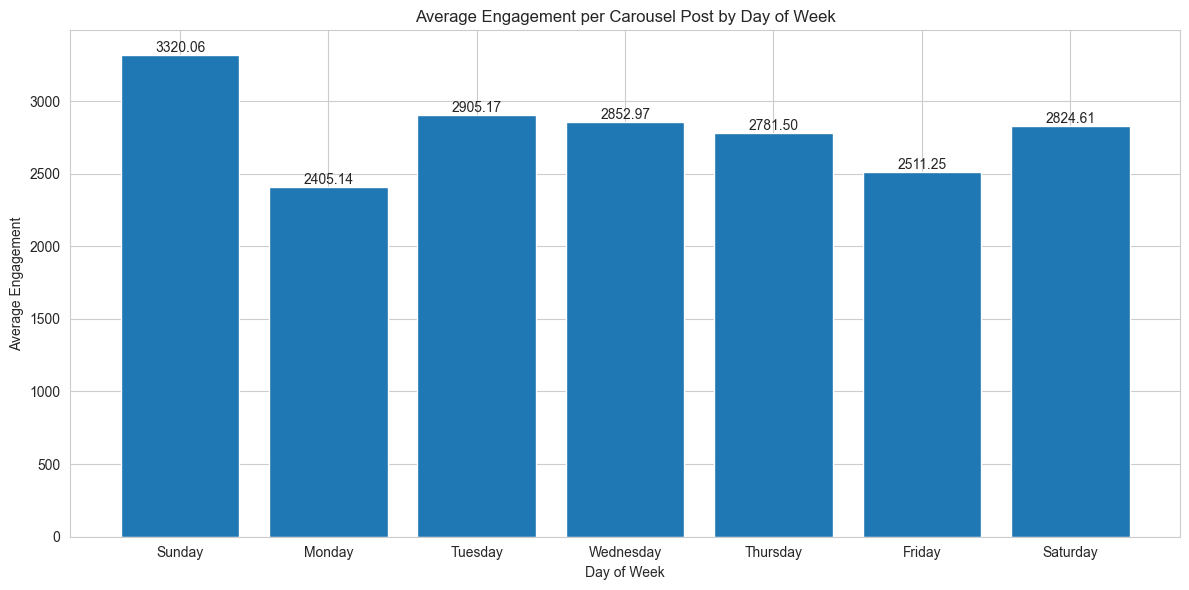

In [ ]:
'''Calculate engagement metrics for carousel posts for each day of the week'''

# Filter the DataFrame for carousel posts
carousel_posts = df[df['post_type'] == 'carousel'].copy()

# Extract the day of the week from the date column
carousel_posts.loc[:, 'day_of_week'] = pd.to_datetime(carousel_posts['date'], dayfirst=True).dt.day_name()

# Calculate total engagement
carousel_posts.loc[:, 'total_engagement'] = carousel_posts['num_likes'] + carousel_posts['num_comments'] + carousel_posts['num_shares']

# Group by day of the week and calculate engagement metrics
engagement_metrics_by_day = carousel_posts.groupby('day_of_week').agg(
    total_likes=('num_likes', 'sum'),
    total_comments=('num_comments', 'sum'),
    total_shares=('num_shares', 'sum'),     
    total_engagement=('total_engagement', 'sum'),   
    avg_engagement_per_post=('total_engagement', 'mean')
).reset_index()

# Sort the days of the week in the correct order
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
engagement_metrics_by_day['day_of_week'] = pd.Categorical(engagement_metrics_by_day['day_of_week'], categories=days_order, ordered=True)
engagement_metrics_by_day = engagement_metrics_by_day.sort_values('day_of_week')

# Display the result
print('Engagement metrics for carousel post for each day of the week', '\n')
print(engagement_metrics_by_day.head(7))

# Plot carousel count vs day of week
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(engagement_metrics_by_day['day_of_week'], engagement_metrics_by_day['avg_engagement_per_post'])

# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

ax.set_title('Average Engagement per Carousel Post by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Engagement')
plt.graph()
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

Interaction between carousel post per week and average engagement per post 

  day_of_week  num_carousel_posts  avg_engagement_per_post
3      Sunday                  32              3320.062500
1      Monday                  29              2405.137931
5     Tuesday                  30              2905.166667
6   Wednesday                  29              2852.965517
4    Thursday                  26              2781.500000
0      Friday                  28              2511.250000
2    Saturday                  33              2824.606061


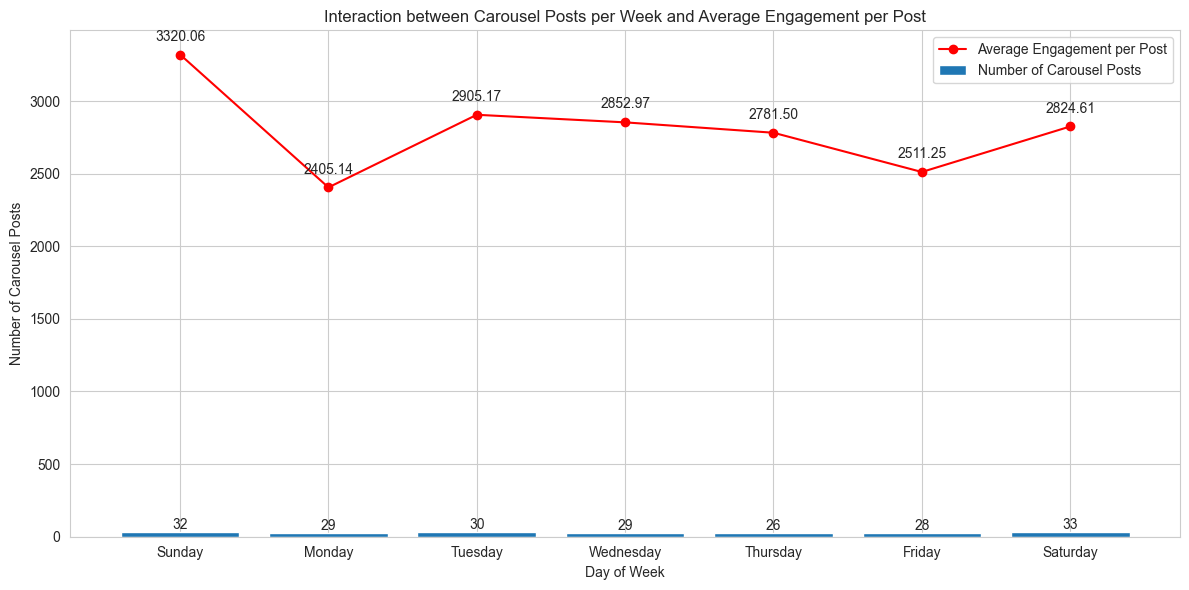

In [ ]:
'''Interaction between carousel post per week andn average engagement per post'''

# Extract the day of the week from the date column
carousel_posts.loc[:, 'day_of_week'] = pd.to_datetime(carousel_posts['date'], dayfirst=True).dt.day_name()

# Calculate total engagement
carousel_posts.loc[:, 'total_engagement'] = carousel_posts['num_likes'] + carousel_posts['num_comments'] + carousel_posts['num_shares']
# Gropup by week and calculate the number of carousel posts and average engagement per post
carousel_weekly = carousel_posts.groupby('day_of_week').agg(
    num_carousel_posts=('post_type', 'count'),
    avg_engagement_per_post=('total_engagement', 'mean')
).reset_index()

# Sort the days of the week in the correct order
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
carousel_weekly['day_of_week'] = pd.Categorical(carousel_weekly['day_of_week'], categories=days_order, ordered=True)
carousel_weekly = carousel_weekly.sort_values('day_of_week')

# Display the result
print('Interaction between carousel post per week and average engagement per post', '\n')
print(carousel_weekly.head(7))

# Plot the number of carousel posts and average engagement per post by day of week
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the number of carousel posts
ax.bar(carousel_weekly['day_of_week'], carousel_weekly['num_carousel_posts'], label='Number of Carousel Posts')
# Plot the average engagement per post
ax.plot(carousel_weekly['day_of_week'], carousel_weekly['avg_engagement_per_post'], color='red', marker='o', label='Average Engagement per Post')

# Add text annotations to each bar for number of carousel posts
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# Add text annotations to the line plot for average engagement per post
for i, txt in enumerate(carousel_weekly['avg_engagement_per_post']):
    ax.annotate(f'{txt:.2f}', (carousel_weekly['day_of_week'].iloc[i], carousel_weekly['avg_engagement_per_post'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('Interaction between Carousel Posts per Week and Average Engagement per Post')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Carousel Posts')
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\EBUKA\AppData\Local\Temp\ipykernel_5700\3153962190.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  image_posts['day_of_week'] = pd.to_datetime(image_posts['date']).dt.day_name()


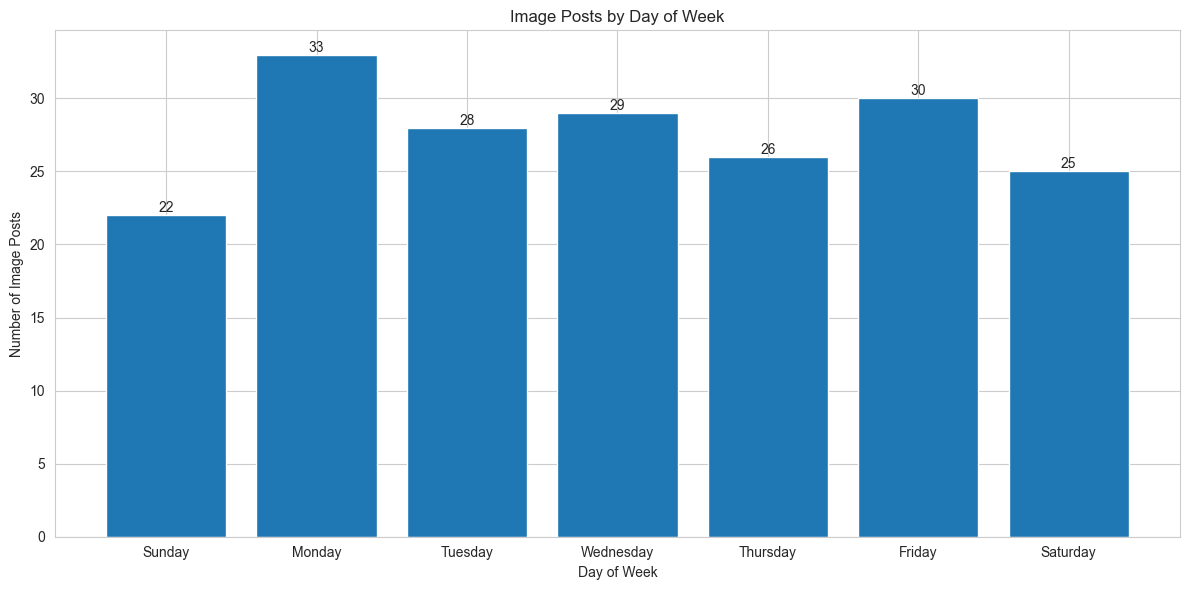

In [ ]:
'''Find out distribution of image posts across each day of the week'''

# Filter the DataFrame for image posts
image_posts = df[df['post_type'] == 'image'].copy()

# Extract the day of the week from the date column for image posts
image_posts['day_of_week'] = pd.to_datetime(image_posts['date']).dt.day_name()

# Group by day of the week and count the number of image posts
image_count_by_day = image_posts['day_of_week'].value_counts().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot image count vs day of week
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(image_count_by_day.index, image_count_by_day.values)

# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

ax.set_title('Image Posts by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Image Posts')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

# Further analysis for Facebook

### Missed Question: Are there patterns in content type, posting frequency, or external factors (e.g., weekdays vs. weekends) that explain peak/lowest engagement?

**Why It Matters**: Knowing why certain times perform better could inform strategy (e.g., posting during peak user activity or targeting specific audiences).
**How to Analyze**: If your platform_peak_hours or larger dataset includes columns like content_type, day_of_week, or post_count, you could:

## DECODE Framework

### Decompose
**Define and Decompose**

Main task crux of this task is to find patterns that explain peak/lowest engagement.

Variables needed as represented in data set:

1. **time**: The time of the post. This is the main variable we are interested in. It will help us identify peak and lowest engagement times.
2. **num_likes**: The number of likes on the post. This is the engagement metric we are interested in. It will help us identify peak and lowest engagement times.
3. **num_shares**: The number of shares on the post. This is another engagement metric we are interested in. It will help us identify peak and lowest engagement times.
4. **num_comments**: The number of comments on the post. This is another engagement metric we are interested in. It will help us identify peak and lowest engagement times.
5. **post_day**: The day of the week the post was made. This will help us identify if there are any patterns in engagement based on the day of the week.
6. **post_type**: The type of post (e.g., image, video, link). This will help us identify if there are any patterns in engagement based on the type of post.
7. **avg_engagement**: The average engagement (likes, shares, comments) per post. This will help us identify peak and lowest engagement times.


### Explore and Extract
Pattern Recognition and Knowledge Connection

We need to explore the data to find patterns that explain peak/lowest engagement. We can do this by:
1. Grouping the data by time and calculating the average engagement for each time.
2. Grouping the data by post_day and calculating the average engagement for each day.
3. Grouping the data by post_type and calculating the average engagement for each type.
4. Grouping the data by time and post_day and calculating the average engagement for each combination.

Do this by using pandas groupby function and then plot the results using matplotlib.


### Construct and Calculate
Solution Stategy and Implementation

### Observe and Optimize
Result Analysis and Solution Refinement

### Derive and Document
Knowledge Extraction and Meta-Analysis

### Extend and Evolve
Generalization and Understanding Deepening
